In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import textstat.textstat
from Utility.plot_utility import plot_mean_bar_graph
from Utility.plot_utility_anova import plot_mean_bar_graph_3candidates

In [2]:
def read_data(file_path):
    full_path = os.path.join('..', 'Cleaned Data', file_path)

    return pd.read_json(full_path, lines=True)

In [3]:
df1 = read_data('one/part-00000-9076dc6d-fa59-4c36-a0cf-8808e309da7b-c000.json.gz')
df2 = read_data('two/part-00000-c7cf2076-eae1-4d0c-bce1-e7b0c43a3bf1-c000.json.gz')
df3 = read_data('three/part-00000-662e59e6-5ee7-48da-a85f-1bcf09724f97-c000.json.gz')
df4 = read_data('four/part-00000-3060ac52-6be0-4d42-a322-3e4a7954a4f4-c000.json.gz')
df5 = read_data('five/part-00000-9c42996a-80d4-4a96-b59b-228f5e241a65-c000.json.gz')
df6 = read_data('six/part-00000-5da94b81-55c0-42e7-b3dc-5a51a14e8589-c000.json.gz')
df7 = read_data('seven/part-00000-eb573e13-d85e-400c-b3db-ffa9bd2d5543-c000.json.gz')
df8 = read_data('eight/part-00000-61526e86-ba2d-4df5-a9d1-d043ca875b62-c000.json.gz')
df9 = read_data('nine/part-00000-dc7c0356-fae4-47b8-a93a-f9b401cf70f0-c000.json.gz')
df10 = read_data('ten/part-00000-f3ae3925-50c4-469e-8304-6007e9b4cdab-c000.json.gz')
df11 = read_data('eleven/part-00000-2aa1781a-723e-49c4-a488-47ca50409657-c000.json.gz')
df12 = read_data('twelve/part-00000-7ff282ff-fa5e-494c-ab5c-59f07d2a2f0d-c000.json.gz')

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df = pd.concat(frames, ignore_index=True)

df;

In [4]:
# Useful columns are: subreddit, score, num_comments

df.columns

Index(['name', 'downs', 'ups', 'hide_score', 'subreddit', 'locked',
       'num_comments', 'id', 'score', 'author', 'stickied', 'title',
       'selftext', 'over_18', 'thumbnail', 'gilded', 'subreddit_id', 'is_self',
       'date', 'datetime', 'word_count_self', 'word_count_title', 'preview',
       'author_flair_css_class', 'author_flair_text', 'link_flair_css_class',
       'link_flair_text'],
      dtype='object')

In [5]:
# Filter out unnecessary columns
columns = [
    'subreddit',
    'score',
    'num_comments'
]

df = df[columns]

df = df.sort_values('num_comments')

#341418 rows
df;

In [6]:
# Filter out rows with no comments
df = df[df['num_comments'] >= 1]

#209600 rows
df;

In [7]:
'''
Mann-Whitney U Test
* assumes samples are independent and identically distributed
* assumes values are ordinal

Dependent variable: num_comments
    * assume that the num_comments change depending on the score
Independent variable: scores from high/low num_comments
'''

'\nMann-Whitney U Test\n* assumes samples are independent and identically distributed\n* assumes values are ordinal\n\nDependent variable: num_comments\n    * assume that the num_comments change depending on the score\nIndependent variable: scores from high/low num_comments\n'

In [8]:
# Separate data by high/low num_comments

median_num_comments = df['num_comments'].median()

high_num_comments_score = df[df['num_comments'] > median_num_comments]['score']
low_num_comments_score = df[df['num_comments'] <= median_num_comments]['score']

high_num_comments_score, low_num_comments_score

(268891       3
 284077       1
 292229      19
 4254        13
 135962       2
           ... 
 256488    1025
 256703     692
 93662     1118
 142790    1159
 91546     2058
 Name: score, Length: 113347, dtype: int64,
 33659     1
 165510    4
 169558    2
 95491     1
 120894    1
          ..
 139482    0
 91958     1
 101481    0
 141165    2
 170739    2
 Name: score, Length: 128230, dtype: int64)

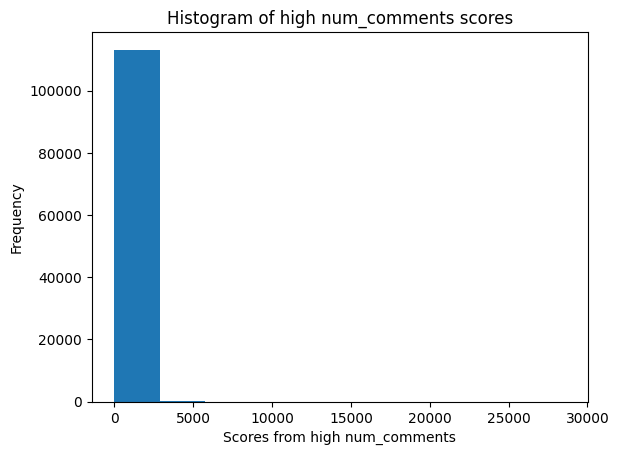

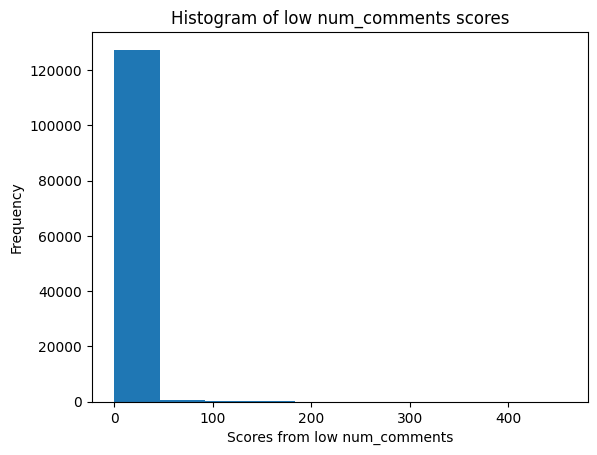

In [9]:
# Test if high_score_comments and low_score_comments have similar distribution

plt.hist(high_num_comments_score, bins=10)
plt.xlabel('Scores from high num_comments')
plt.ylabel('Frequency')
plt.title('Histogram of high num_comments scores')
plt.show()

plt.hist(low_num_comments_score, bins=10)
plt.xlabel('Scores from low num_comments')
plt.ylabel('Frequency')
plt.title('Histogram of low num_comments scores')
plt.show()

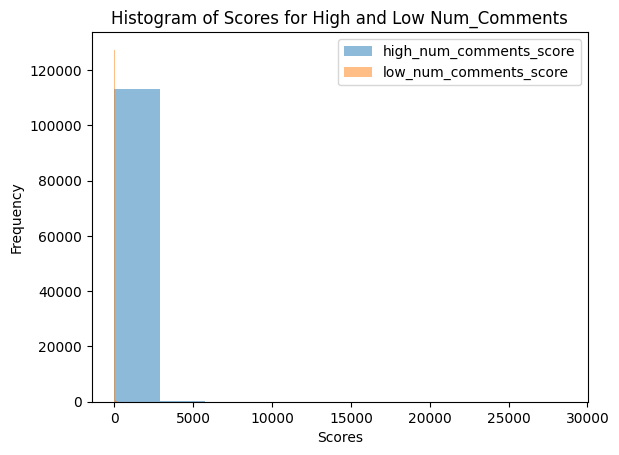

In [10]:
# Plot the histograms for high_score_comments and low_score_comments on the same plot

plt.hist(high_num_comments_score, bins=10, alpha=0.5, label='high_num_comments_score')
plt.hist(low_num_comments_score, bins=10, alpha=0.5, label='low_num_comments_score')

plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for High and Low Num_Comments')
plt.legend(loc='upper right')

plt.show()


In [11]:
'''
Note to self:

Since both high_score_comments and low_score_comments have similar distribution
Proceed with Mann-Whitney U Test
'''

'\nNote to self:\n\nSince both high_score_comments and low_score_comments have similar distribution\nProceed with Mann-Whitney U Test\n'

In [12]:
# Perform Mann-Whitney U Test
# p-value < 0.05 indicates distributions are not equal between two sets of data

statistic, p_value = stats.mannwhitneyu(high_num_comments_score, low_num_comments_score)

def interpret_mannwhitneyu(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the two groups are significantly different:\n the number of comments may have an impact on the score of a post"
    else:
        return "The distributions of the two groups are not significantly different:\n the number of comments does not have a significant impact on the score of a post"


print(f'Mann-Whitney U test statistic: {statistic}, p-value: {p_value}')
print(interpret_mannwhitneyu(p_value))

Mann-Whitney U test statistic: 9909017214.5, p-value: 0.0
The distributions of the two groups are significantly different:
 the number of comments may have an impact on the score of a post


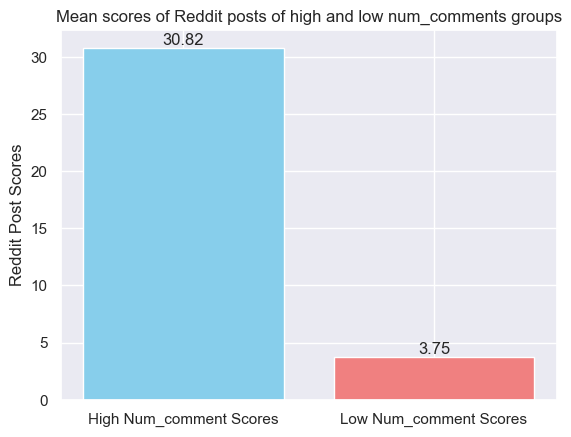

In [13]:
# Plot mean scores of high/low num_comments
plot_mean_bar_graph(high_num_comments_score,
                    low_num_comments_score, 
                    'Mean scores of Reddit posts of high and low num_comments groups', 
                    ['High Num_comment Scores', 'Low Num_comment Scores'], 
                    'Reddit Post Scores', 
                    '../Graphs/num_comments.png')

In [14]:
# Perform a normality test on the num_comments

statistic, p_value = stats.normaltest(df['num_comments'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column num_comments is not normally distributed (p-value < 0.05).")
else:
    print("The column num_comments is approximately normally distributed (p-value >= 0.05).")

p_value: 0.0
The column num_comments is not normally distributed (p-value < 0.05).


Text(0.5, 1.0, 'Histogram of num_comments')

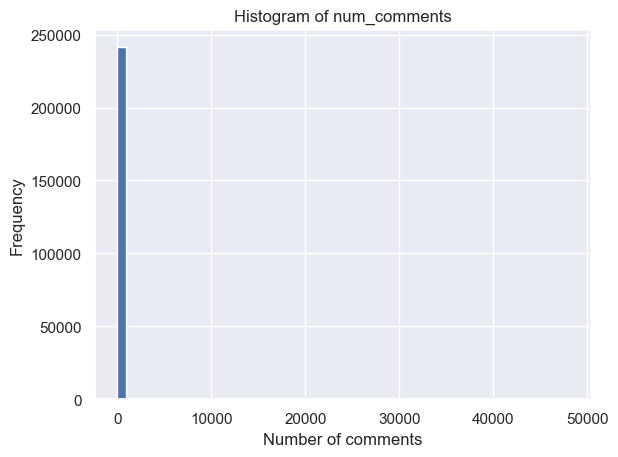

In [15]:
# Rough eye test of num_comments distribution

plt.hist(df['num_comments'], bins=50)
plt.xlabel('Number of comments')
plt.ylabel('Frequency')
plt.title('Histogram of num_comments')

In [16]:
# Transform num_comments

'''
.exp results in inf num_comments
.square results in left-skewed histogram
.log results in semi left-skewed histogram
.sqrt results in semi left-skewed histogram
'''
#df['num_comments_exp'] = np.exp(df['num_comments']) 
df['num_comments_square'] = np.square(df['num_comments'])
df['num_comments_log'] = np.log(df['num_comments'] + 1) 
df['num_comments_sqrt'] = np.sqrt(df['num_comments'])

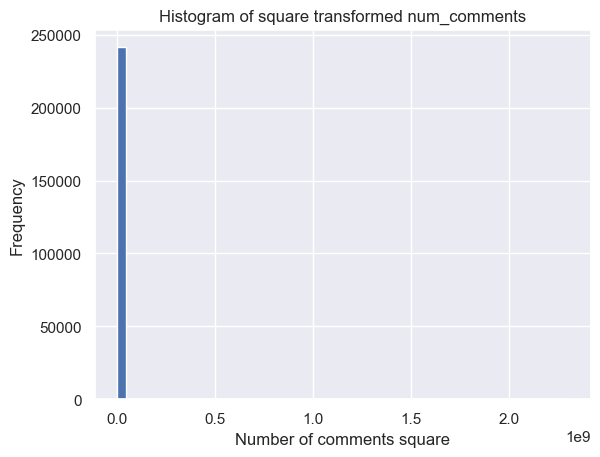

In [17]:
plt.hist(df['num_comments_square'], bins=50)
plt.xlabel('Number of comments square')
plt.ylabel('Frequency')
plt.title('Histogram of square transformed num_comments')
plt.show()

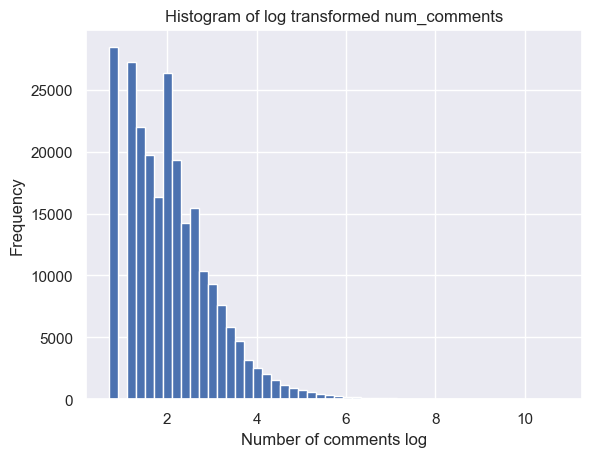

In [18]:
plt.hist(df['num_comments_log'], bins=50)
plt.xlabel('Number of comments log')
plt.ylabel('Frequency')
plt.title('Histogram of log transformed num_comments')
plt.show()

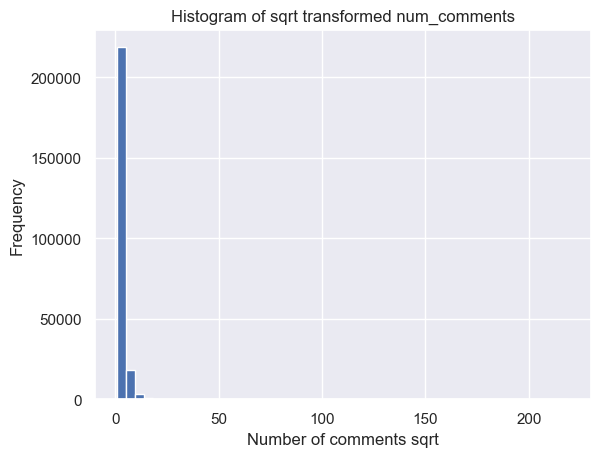

In [19]:
plt.hist(df['num_comments_sqrt'], bins=50)
plt.xlabel('Number of comments sqrt')
plt.ylabel('Frequency')
plt.title('Histogram of sqrt transformed num_comments')
plt.show()

In [20]:
# Perform a normality test on transformed num_comments

statistic, p_value = stats.normaltest(df['num_comments_square'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column num_comments_square is not normally distributed (p-value < 0.05).")
else:
    print("The column num_comments_square is approximately normally distributed (p-value >= 0.05).")


p_value: 0.0
The column num_comments_square is not normally distributed (p-value < 0.05).


In [21]:
# Perform a normality test on transformed num_comments

statistic, p_value = stats.normaltest(df['num_comments_log'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column num_comments_log is not normally distributed (p-value < 0.05).")
else:
    print("The column num_comments_log is approximately normally distributed (p-value >= 0.05).")


p_value: 0.0
The column num_comments_log is not normally distributed (p-value < 0.05).


In [22]:
# Perform a normality test on transformed num_comments

statistic, p_value = stats.normaltest(df['num_comments_sqrt'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column num_comments_sqrt is not normally distributed (p-value < 0.05).")
else:
    print("The column num_comments_sqrt is approximately normally distributed (p-value >= 0.05).")


p_value: 0.0
The column num_comments_sqrt is not normally distributed (p-value < 0.05).


In [23]:
'''
Note to self:

None of the histograms of transformed appear normal enough
None of the p-values for the normal test reflects a normal distribution

Since there are no signs of a normal distribution before and after transformation, we WILL NOT proceed with ttest or AVOVA

The code below will perform both a Ttest and ANOVA one-way on the original num_comments column
'''

'\nNote to self:\n\nNone of the histograms of transformed appear normal enough\nNone of the p-values for the normal test reflects a normal distribution\n\nSince there are no signs of a normal distribution before and after transformation, we WILL NOT proceed with ttest or AVOVA\n\nThe code below will perform both a Ttest and ANOVA one-way on the original num_comments column\n'

In [24]:
# Separate scores by low, medium, high num_comments

df['num_comments_category'] = pd.qcut(df['num_comments'], 3, labels=['low', 'medium', 'high'])

low_num_comments = df[df['num_comments_category'] == 'low']['score']
medium_num_comments = df[df['num_comments_category'] == 'medium']['score']
high_num_comments = df[df['num_comments_category'] == 'high']['score']

low_num_comments,medium_num_comments,high_num_comments;

In [25]:
# Perform Ttest on the original num_comments

statistic, p_value = stats.ttest_ind(high_num_comments_score, low_num_comments_score)

print(f'Ttest statistic: {statistic}, p-value: {p_value}')

def interpret_ttest(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the two groups are significantly different:\n the number of comments may have an impact on the score of a post"
    else:
        return "The distributions of the two groups are not significantly different:\n the number of comments does not have a significant impact on the score of a post"

print(interpret_ttest(p_value))

Ttest statistic: 45.88728173224472, p-value: 0.0
The distributions of the two groups are significantly different:
 the number of comments may have an impact on the score of a post


In [26]:
# Perform one-way ANOVA on the original num_comments

statistic, p_value = stats.f_oneway(low_num_comments,medium_num_comments,high_num_comments)

print(f'ANOVA one-way test statistic: {statistic}, p-value: {p_value}')

def interpret_anova(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the three groups are significantly different:\n the popularity of subreddits may have an impact on the score of a post"
    else:
        return "The distributions of the three groups are not significantly different:\n the popularity of subreddits does not have a significant impact on the score of a post"

print(interpret_anova(p_value))

ANOVA one-way test statistic: 1889.7946391742298, p-value: 0.0
The distributions of the three groups are significantly different:
 the popularity of subreddits may have an impact on the score of a post
